# Data Exploration

Import the survey data from a csv

In [1]:
import csv

In [2]:
with open('survey_results_public.csv', newline='', encoding="utf8") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            print(f'Column names are {", ".join(row)}')
            line_count+= 1
        else:
            line_count += 1
    print(f'Processed {line_count} lines.')

Column names are Respondent, Hobby, OpenSource, Country, Student, Employment, FormalEducation, UndergradMajor, CompanySize, DevType, YearsCoding, YearsCodingProf, JobSatisfaction, CareerSatisfaction, HopeFiveYears, JobSearchStatus, LastNewJob, AssessJob1, AssessJob2, AssessJob3, AssessJob4, AssessJob5, AssessJob6, AssessJob7, AssessJob8, AssessJob9, AssessJob10, AssessBenefits1, AssessBenefits2, AssessBenefits3, AssessBenefits4, AssessBenefits5, AssessBenefits6, AssessBenefits7, AssessBenefits8, AssessBenefits9, AssessBenefits10, AssessBenefits11, JobContactPriorities1, JobContactPriorities2, JobContactPriorities3, JobContactPriorities4, JobContactPriorities5, JobEmailPriorities1, JobEmailPriorities2, JobEmailPriorities3, JobEmailPriorities4, JobEmailPriorities5, JobEmailPriorities6, JobEmailPriorities7, UpdateCV, Currency, Salary, SalaryType, ConvertedSalary, CurrencySymbol, CommunicationTools, TimeFullyProductive, EducationTypes, SelfTaughtTypes, TimeAfterBootcamp, HackathonReasons, 

It's pretty useful but doesn't provide easy manipulation of columns. Next, let us take a look at pandas dataframes:

In [3]:
import pandas as pd

Save the csv into a variable dataframe:

In [4]:
df=pd.read_csv("survey_results_public.csv", encoding ="utf8", low_memory=False)

Now we can query the dataframe by column numbers

In [5]:
df[df.columns[1]]

0        Yes
1        Yes
2        Yes
3         No
4        Yes
        ... 
98850    Yes
98851     No
98852    Yes
98853    Yes
98854    Yes
Name: Hobby, Length: 98855, dtype: object

Or we can utilize names:

In [6]:
df["Student"]

0                    No
1                    No
2                    No
3                    No
4        Yes, part-time
              ...      
98850               NaN
98851    Yes, full-time
98852    Yes, full-time
98853                No
98854               NaN
Name: Student, Length: 98855, dtype: object

Now, the data we need is: Parent's Education, Education, Reporting Responsibility, Employment, Reporting Code, and Salary.

In [7]:
new_df = df[['Respondent', 'FormalEducation', 'EthicalImplications', 'Employment', 'EthicsReport', 'ConvertedSalary']].copy()

And we can verify that our dataframe is correct (columns are split into mutiple lines of entries):

In [8]:
new_df

,Respondent,FormalEducation,EthicalImplications,Employment,EthicsReport,ConvertedSalary
0,1,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,Employed part-time,"Yes, and publicly",NaN
1,3,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,Employed full-time,Depends on what it is,70841.0
2,4,Associate degree,NaN,Employed full-time,NaN,NaN
3,5,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,Employed full-time,"Yes, but only within the company",NaN
4,7,Some college/university study without earning ...,Yes,Employed full-time,"Yes, but only within the company",21426.0
...,...,...,...,...,...,...
98850,101513,NaN,NaN,NaN,NaN,NaN
98851,101531,NaN,NaN,"Not employed, but looking for work",NaN,NaN
98852,101541,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,Employed full-time,NaN,NaN
98853,101544,Some college/university study without earning ...,NaN,"Independent contractor, freelancer, or self-em...",NaN,NaN


Given this new table, we can now output to another csv which is purely for the columns we're interested in.

In [9]:
new_df.to_csv('survey_results_public_important.csv', index=False, encoding='utf-8')

## Now we need to clean up the data. Only use entries that have ALL the fields entered

In [10]:
cleaned_survey_results = new_df.copy().dropna()

In [11]:
cleaned_survey_results

,Respondent,FormalEducation,EthicalImplications,Employment,EthicsReport,ConvertedSalary
1,3,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,Employed full-time,Depends on what it is,70841.0
4,7,Some college/university study without earning ...,Yes,Employed full-time,"Yes, but only within the company",21426.0
5,8,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Unsure / I don't know,Employed full-time,Depends on what it is,41671.0
6,9,Some college/university study without earning ...,Yes,Employed full-time,"Yes, but only within the company",120000.0
8,11,Some college/university study without earning ...,Yes,Employed full-time,"Yes, and publicly",250000.0
...,...,...,...,...,...,...
89932,99868,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Yes,"Not employed, but looking for work","Yes, and publicly",97233.0
89946,100383,"Secondary school (e.g. American high school, G...",Unsure / I don't know,"Not employed, and not looking for work",Depends on what it is,0.0
89954,100743,"Secondary school (e.g. American high school, G...",Yes,"Not employed, and not looking for work",Depends on what it is,10284.0
89960,100927,"Secondary school (e.g. American high school, G...",Unsure / I don't know,Employed full-time,Depends on what it is,0.0


Well that was easy! I wasn't anticipating it to be such an easy command, but go Pandas!

## Now, let's quantify the responses of each column
Create a dictionary for each column

'EducationParents', 'FormalEducation', 'EthicalImplications', 'Employment', 'EthicsReport', 'ConvertedSalary'

In [12]:
quantified_survey_results = cleaned_survey_results.copy()

### FormalEducation

In [13]:
print(cleaned_survey_results['FormalEducation'].unique())

['Bachelor’s degree (BA, BS, B.Eng., etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Master’s degree (MA, MS, M.Eng., MBA, etc.)' 'Associate degree'
 'Professional degree (JD, MD, etc.)'
 'Other doctoral degree (Ph.D, Ed.D., etc.)' 'Primary/elementary school'
 'I never completed any formal education']


In [14]:
FormalEducation = {'Professional degree (JD, MD, etc.)': 8,
                    'Other doctoral degree (Ph.D, Ed.D., etc.)': 7,
                    'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 6,
                    'Bachelor’s degree (BA, BS, B.Eng., etc.)': 5,
                    'Associate degree': 4,
                    'They never completed any formal education': 3,
                    'I never completed any formal education': 3,
                    'Some college/university study without earning a degree': 2,
                    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 1,
                    'Primary/elementary school': 0}
quantified_survey_results['FormalEducation'] = cleaned_survey_results['FormalEducation'].replace(FormalEducation)
print(quantified_survey_results['FormalEducation'].unique())

[5 2 1 6 4 8 7 0 3]


### EthicsImplications

In [15]:
print(cleaned_survey_results['EthicalImplications'].unique())

['Yes' "Unsure / I don't know" 'No']


In [16]:
# Note: Will the negative number affect our results too much?

EthicalImplications = {'Yes': 1, 
                        "Unsure / I don't know": 0,
                      "No": -1}

quantified_survey_results['EthicalImplications'] = cleaned_survey_results['EthicalImplications'].replace(EthicalImplications)
print(quantified_survey_results['Employment'].unique())

['Employed full-time' 'Employed part-time'
 'Independent contractor, freelancer, or self-employed'
 'Not employed, and not looking for work'
 'Not employed, but looking for work' 'Retired']


### Employment

In [17]:
# Note: This was the hardest one to quantify. Also I think we should ommit 'Retired' but I want to see what you all think

Employment = {"Employed full-time": 5,
                "Independent contractor, freelancer, or self-employed": 4,
              'Employed part-time': 3,
              'Not employed, but looking for work': 2,
              'Not employed, and not looking for work': 1,
              'Retired':0
}

quantified_survey_results['Employment'] = cleaned_survey_results['Employment'].replace(Employment)
print(quantified_survey_results['Employment'].unique())

[5 3 4 1 2 0]


### EthicsReport

In [18]:
quantified_survey_results = quantified_survey_results[quantified_survey_results.EthicsReport != 'Depends on what it is']

In [19]:
quantified_survey_results

,Respondent,FormalEducation,EthicalImplications,Employment,EthicsReport,ConvertedSalary
4,7,2,1,5,"Yes, but only within the company",21426.0
6,9,2,1,5,"Yes, but only within the company",120000.0
8,11,2,1,5,"Yes, and publicly",250000.0
14,21,1,1,5,"Yes, and publicly",0.0
17,27,6,1,5,"Yes, and publicly",47904.0
...,...,...,...,...,...,...
89898,98419,5,0,3,"Yes, and publicly",4548.0
89913,98833,8,1,2,"Yes, and publicly",25788.0
89922,99355,1,1,1,"Yes, but only within the company",0.0
89925,99477,1,0,1,"Yes, and publicly",0.0


In [20]:
Report = {"Yes, but only within the company":1, 
          "Yes, and publicly":1, 
          "No":0
         }

quantified_survey_results['EthicsReport'] = quantified_survey_results['EthicsReport'].replace(Report)

In [21]:
quantified_survey_results

,Respondent,FormalEducation,EthicalImplications,Employment,EthicsReport,ConvertedSalary
4,7,2,1,5,1,21426.0
6,9,2,1,5,1,120000.0
8,11,2,1,5,1,250000.0
14,21,1,1,5,1,0.0
17,27,6,1,5,1,47904.0
...,...,...,...,...,...,...
89898,98419,5,0,3,1,4548.0
89913,98833,8,1,2,1,25788.0
89922,99355,1,1,1,1,0.0
89925,99477,1,0,1,1,0.0


### ConvertedSalary

In [22]:
print(quantified_survey_results['ConvertedSalary'].unique())

[ 21426. 120000. 250000. ...    400.   1050.   1584.]


In [23]:
# quantified_survey_results.to_csv('quantified.csv', index=False, encoding='utf-8')

In [24]:
quantified_survey_results['ConvertedSalary'].max()

2000000.0

In [25]:
quantified_survey_results['ConvertedSalary'].min()

0.0

In [26]:
salary_bins = [0, 10000,40000,80000,160000,200000,500000,2000000]

In [27]:
quantified_survey_results['ConvertedSalary'] = pd.cut(x=quantified_survey_results['ConvertedSalary'], bins = salary_bins, include_lowest=True, labels=[0,1,2,3,4,5,6])

In [28]:
quantified_survey_results

,Respondent,FormalEducation,EthicalImplications,Employment,EthicsReport,ConvertedSalary
4,7,2,1,5,1,1
6,9,2,1,5,1,3
8,11,2,1,5,1,5
14,21,1,1,5,1,0
17,27,6,1,5,1,2
...,...,...,...,...,...,...
89898,98419,5,0,3,1,0
89913,98833,8,1,2,1,1
89922,99355,1,1,1,1,0
89925,99477,1,0,1,1,0


## Histograms

In [29]:
def make_histogram(column_name, num_bins=False):
    if not num_bins:
        num_bins = len(quantified_survey_results[column_name].unique())
    hist = quantified_survey_results[column_name].hist(bins=num_bins, )
    hist.set_title(column_name)
    return hist

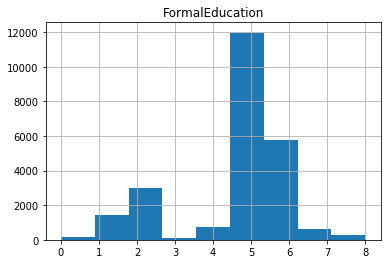

In [72]:
make_histogram('FormalEducation')

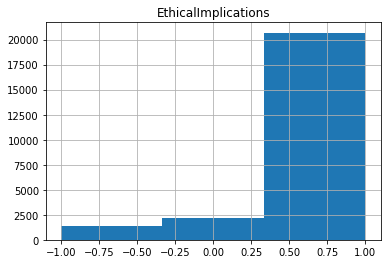

In [31]:
make_histogram('EthicalImplications')

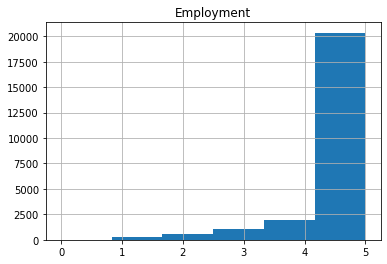

In [32]:
make_histogram('Employment')

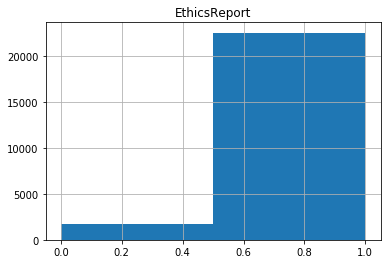

In [33]:
make_histogram('EthicsReport')

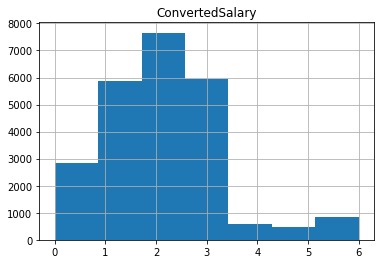

In [34]:
make_histogram('ConvertedSalary')

## Get the results of a specific row

In [35]:
quantified_survey_results.iloc[0]

Respondent             7
FormalEducation        2
EthicalImplications    1
Employment             5
EthicsReport           1
ConvertedSalary        1
Name: 4, dtype: object

## Stratifying

In [36]:
stratified = quantified_survey_results.copy()
stratified = stratified.drop(columns=["Respondent"])
stratified = stratified.groupby(['FormalEducation', 'EthicalImplications'])

### Here is the mean of each strata

In [37]:
stratified.mean()

Employment  EthicsReport
FormalEducation EthicalImplications                          
0               -1                     3.437500      0.437500
                 0                     2.857143      0.809524
                 1                     3.618056      0.923611
1               -1                     3.968000      0.584000
                 0                     3.950355      0.822695
                 1                     4.069456      0.948954
2               -1                     4.491620      0.603352
                 0                     4.536170      0.825532
                 1                     4.597697      0.960461
3               -1                     3.875000      1.000000
                 0                     3.750000      0.833333
                 1                     4.324324      0.945946
4               -1                     4.837209      0.674419
                 0                     4.633333      0.816667
                 1                     4.671254      0.952599
5               -1                     4.709677      0.683871
                 0                     4.758422      0.875842
                 1                     4.804613      0.957259
6               -1                     4.796178      0.707006
                 0                     4.831633      0.846939
                 1                     4.797458      0.954490
7               -1                     4.923077      0.461538
                 0                     4.735294      0.882353
                 1                     4.833333      0.965636
8               -1                     4.869565      0.608696
                 0                     4.883721      0.883721
                 1                     4.680672      0.894958

Here's a histogram of the mean

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f5f6e50>,
      dtype=object)

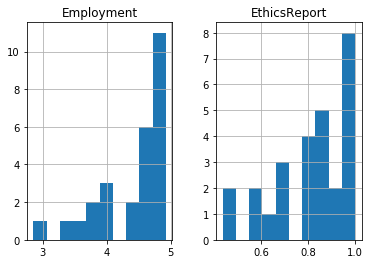

In [38]:
stratified.mean().hist()

In [39]:
# stratified.mean().to_csv('stratified_mean.csv', index=True, encoding='utf-8')

### Getting a specific stata

In [40]:
stratified.get_group((1, 1))
# stratified.mean()

,FormalEducation,EthicalImplications,Employment,EthicsReport,ConvertedSalary
14,1,1,5,1,0
160,1,1,3,1,2
244,1,1,5,1,2
495,1,1,3,1,0
563,1,1,3,1,1
...,...,...,...,...,...
89806,1,1,0,0,1
89816,1,1,2,1,0
89820,1,1,2,1,0
89888,1,1,4,0,0


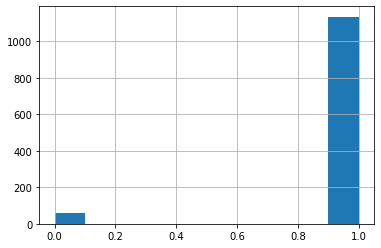

In [41]:
stratified.get_group((1, 1))['EthicsReport'].hist()

In [42]:
len(stratified)

27

# Probability

Now we can define a function which will be able to tell us the probability for a certain event string, given a conditional string. An example of the notation is as follows: 
$$p(x=2|y=3, v=1) = probability(\text{"x == 2"}, \text{"y == 3 and v == 1"})$$

In [43]:
def probability (event_string, conditional_string):
    #note this will go off the quantified_survey_results
    data = quantified_survey_results.copy()
    
    if conditional_string:
        conditioned_data = data.query(conditional_string)
    else:
        conditioned_data = data
    event_given_conditioned_data = conditioned_data.query(event_string)
    
    return len(event_given_conditioned_data) / len(conditioned_data) if len(conditioned_data) != 0 else 0

A couple sample examples can be found below where we condition on an event, and when we do not:

In [44]:
probability('Employment == 5', 'FormalEducation == 1 and EthicalImplications == 1')

0.5765690376569038

In [45]:
probability('EthicsReport == 1', '')

0.9303737352880446

# 3.2.2 IP Weighting

We can now define our function for IP weighting:

In [46]:
import numpy as np

In [47]:
def ipw():
    # Define all of the ranges:
    education_range = [0,1,2,3,4,5,6,7]
    employment_range = [0,1,2,3,4,5]
    ethics_range = [-1,0,1]
    treatment_range = [0,1]
    salary_range = [0,1,2,3,4,5,6]
    
    # Master array to hold all the calculated probabilities
    covariates_prob = []
    
    # Cover all covariates:
    for edu in education_range:
        for emp in employment_range:
            for eth in ethics_range:
                
                treated = []
                untreated = []
                
                # Calculated 
                for sal in salary_range:
                    untreated.append(probability("ConvertedSalary == "+ str(sal), "FormalEducation == " + str(edu) + " and EthicalImplications == " + str(eth) + " and Employment == " + str(emp) + " and EthicsReport == " + str(treatment_range[0])))
                    
                for sal in salary_range:
                    treated.append(probability("ConvertedSalary == "+ str(sal), "FormalEducation == " + str(edu) + " and EthicalImplications == " + str(eth) + " and Employment == " + str(emp) + " and EthicsReport == " + str(treatment_range[1])))
                
                covariates_prob.append([probability("FormalEducation == " + str(edu) + " and EthicalImplications == " + str(eth) + " and Employment == " + str(emp), ""), untreated, treated])
                
    return covariates_prob

In [48]:
data_probabilities = np.array(ipw())

The output result will be an array where the first column is the probability for the covariate level, the second column holds the probabilities for the results within that covariate level for untreated individuals, and the last column holds similarly for the treated individuals.

In [49]:
data_probabilities

array([[4.1296716911005576e-05, list([0, 0, 0, 0, 0, 0, 0]),
        list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])],
       [0.0, list([0, 0, 0, 0, 0, 0, 0]), list([0, 0, 0, 0, 0, 0, 0])],
       [0.0, list([0, 0, 0, 0, 0, 0, 0]), list([0, 0, 0, 0, 0, 0, 0])],
       [0.0001651868676440223, list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])],
       [0.00028907701837703904,
        list([0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]),
        list([0.6, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0])],
       [0.001073714639686145, list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])],
       [4.1296716911005576e-05, list([0, 0, 0, 0, 0, 0, 0]),
        list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])],
       [8.259343382201115e-05, list([0, 0, 0, 0, 0, 0, 0]),
        list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])],
       [0.0006194507536650836, list([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
        list([0.9285714285714286, 0.07142857142857142, 0.0

With the data, we can select based on the columns. For instance, we can get just the probabilities:

In [50]:
data_probabilities[:,0]

array([4.1296716911005576e-05, 0.0, 0.0, 0.0001651868676440223,
       0.00028907701837703904, 0.001073714639686145,
       4.1296716911005576e-05, 8.259343382201115e-05,
       0.0006194507536650836, 0.0, 0.0001651868676440223,
       0.0006607474705760892, 4.1296716911005576e-05,
       0.00012389015073301673, 0.0007433409043981003,
       0.0003716704521990502, 0.00020648358455502787,
       0.002849473466859385, 0.0, 0.0, 4.1296716911005576e-05,
       0.0004955606029320669, 0.0004542638860210613,
       0.0030559570514144124, 0.00041296716911005574,
       0.0005781540367540781, 0.0038405946727235185,
       0.0007020441874870947, 0.0010324179227751394, 0.008011563080735081,
       0.0007020441874870947, 0.0004955606029320669, 0.005946727235184803,
       0.002849473466859385, 0.0032624406359694404, 0.02845343795168284,
       0.0, 0.0, 8.259343382201115e-05, 0.0001651868676440223,
       0.00020648358455502787, 0.0013214949411521784,
       0.00028907701837703904, 0.0004542638860

We can now take the covariate probabilities and then multiply by our population to find out how many individuals will be in each covariate level.

In [51]:
num_in_cov = data_probabilities[:,0] * len(quantified_survey_results)
print(num_in_cov)

[1.0 0.0 0.0 4.0 7.0 26.0 1.0 2.0 14.999999999999998 0.0 4.0 16.0 1.0 3.0
 18.0 9.0 5.0 69.0 0.0 0.0 1.0 12.0 11.0 74.0 10.0 14.0 93.0 17.0 25.0
 194.0 17.0 12.0 144.0 69.0 79.0 689.0 0.0 0.0 2.0 4.0 5.0 32.0 7.0 11.0
 87.0 17.0 14.0 186.0 20.0 28.0 277.0 131.0 177.0 2021.0 1.0 0.0 0.0 0.0
 1.0 5.0 1.0 3.0 6.0 0.0 1.0 0.0 1.0 0.0 12.0 5.0 7.0 51.0 0.0 0.0 2.0 0.0
 0.0 4.0 0.0 3.0 27.000000000000004 2.0 3.0 29.999999999999996 3.0 7.0
 48.0 38.0 47.0 543.0 0.0 0.0 3.0 6.0 4.0 47.0 16.0 32.0 180.0
 29.999999999999996 41.0 309.0 48.0 57.0 655.0 520.0 905.0 9124.0 0.0 0.0
 2.0 1.0 2.0 26.0 4.0 11.0 72.0 9.0 6.0 119.99999999999999
 29.999999999999996 46.0 418.0 270.0 523.0 4240.0 0.0 0.0 1.0 0.0 1.0 2.0
 0.0 1.0 5.0 0.0 0.0 12.0 2.0 2.0 45.0 24.0 29.999999999999996 517.0]


Next, we can clear out all the accuracy errors.

In [52]:
num_in_cov = np.around(num_in_cov.astype(np.double), 1).astype(np.int)
print(num_in_cov)

[   1    0    0    4    7   26    1    2   15    0    4   16    1    3
   18    9    5   69    0    0    1   12   11   74   10   14   93   17
   25  194   17   12  144   69   79  689    0    0    2    4    5   32
    7   11   87   17   14  186   20   28  277  131  177 2021    1    0
    0    0    1    5    1    3    6    0    1    0    1    0   12    5
    7   51    0    0    2    0    0    4    0    3   27    2    3   30
    3    7   48   38   47  543    0    0    3    6    4   47   16   32
  180   30   41  309   48   57  655  520  905 9124    0    0    2    1
    2   26    4   11   72    9    6  120   30   46  418  270  523 4240
    0    0    1    0    1    2    0    1    5    0    0   12    2    2
   45   24   30  517]


In [53]:
untreated_prob = data_probabilities[:,1]
untreated_prob.view()

array([list([0, 0, 0, 0, 0, 0, 0]), list([0, 0, 0, 0, 0, 0, 0]),
       list([0, 0, 0, 0, 0, 0, 0]),
       list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5]),
       list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0, 0, 0, 0, 0, 0, 0]), list([0, 0, 0, 0, 0, 0, 0]),
       list([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0, 0, 0, 0, 0, 0, 0]), list([0, 0, 0, 0, 0, 0, 0]),
       list([0, 0, 0, 0, 0, 0, 0]),
       list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.0, 0.3333333333333333, 0.3333333333333333, 0.0, 0.0, 0.0, 0.3333333333333333]),
       list([0.0, 0.6666666666666666, 0.16666666666666666, 0.16666666666666666, 0.0, 0.0, 0.0]),
       list([0, 0, 0, 0, 0, 0, 0]),
       list([0.25, 0.0, 0.5, 0.25, 0.0, 0.0, 0.0]),
       list([0, 0, 0, 0, 0, 0, 0]), list([0, 0, 0, 0, 0, 0, 0]),
       list([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.6666666666666666, 0.333

In [54]:
treated_prob = data_probabilities[:,2]
treated_prob.view()

array([list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0, 0, 0, 0, 0, 0, 0]), list([0, 0, 0, 0, 0, 0, 0]),
       list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.6, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.9285714285714286, 0.07142857142857142, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0, 0, 0, 0, 0, 0, 0]),
       list([0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.625, 0.125, 0.125, 0.0625, 0.0625, 0.0, 0.0]),
       list([0, 0, 0, 0, 0, 0, 0]),
       list([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.4, 0.26666666666666666, 0.13333333333333333, 0.13333333333333333, 0.06666666666666667, 0.0, 0.0]),
       list([0.6666666666666666, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([0.0, 0.6, 0.2, 0.2, 0.0, 0.0, 0.0]),
       list([0.1076923076923077, 0.26153846153846155, 0.2923076923076923, 0.

We can now go through all of the covariate levels and the treated / untreated results and multiply by the number of individuals in the covariate leve (as if they were all treated, or all untreated).

In [55]:
untreated_array = []
treated_array = []
for level in range(len(num_in_cov)):
    untreated_array.append(np.multiply(num_in_cov[level], untreated_prob[level]))
    treated_array.append(np.multiply(num_in_cov[level], treated_prob[level]))

In [56]:
untreated_array = np.array(untreated_array)
treated_array = np.array(treated_array)

In [57]:
print(untreated_array)

[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [  0.           8.           2.         ...   0.           8.
    2.        ]
 [  0.           0.          10.         ...  10.           0.
    0.        ]
 [  0.         137.86666667 103.4        ...   0.           0.
   34.46666667]]


In [58]:
print(treated_array)

[[  1.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 ...
 [  4.           8.           4.         ...   0.           0.
    0.        ]
 [  1.11111111   4.44444444  11.11111111 ...   3.33333333   2.22222222
    1.11111111]
 [  6.17928287  52.52390438 198.76693227 ...  35.01593625  20.59760956
   22.65737052]]


Next, we can take the count of all of those individuals across our salary ranges:

In [59]:
untreated_cov_count = []
treated_cov_count = []
for i in range(7):
    untreated_cov_count.append(sum(untreated_array[:,i]))
    treated_cov_count.append(sum(treated_array[:,i]))

And we can see these the count of individuals within each salary range for the untreated (as both values and probabilities)

In [60]:
print(untreated_cov_count)
untreated_cov_count = untreated_cov_count / sum(untreated_cov_count) 
print(untreated_cov_count)

[4765.636415648822, 8548.794220625497, 5459.314803489284, 3665.546061505692, 256.63095839726003, 297.7564241011063, 827.3211162323373]
[0.2000603  0.35887638 0.22918076 0.15387877 0.01077331 0.01249974
 0.03473075]


And the same for the treated

In [61]:
print(treated_cov_count)
treated_cov_count = treated_cov_count / sum(treated_cov_count) 
print(treated_cov_count)

[2726.8035388813487, 5591.385010618098, 7665.374722074746, 6033.609362100252, 582.3934502204446, 490.8001350506719, 814.6337810544378]
[0.11406833 0.23390023 0.32065989 0.25239947 0.02436283 0.02053128
 0.03407797]


Finally, we can set the tuple list and calculate our risk measures:

In [62]:
salary_range = [0,1,2,3,4,5,6]
salary_bins = [10000,40000,80000,160000,200000,500000,2000000]
tuple_list = []

for sal in salary_range:
    tuple_list.append((untreated_cov_count[sal],treated_cov_count[sal]))
    
print(tuple_list)

[(0.20006030039246134, 0.11406833461122565), (0.3588763788516644, 0.23390023052156866), (0.2291807566218582, 0.32065989215957946), (0.15387876501850015, 0.2523994713281846), (0.010773307518461023, 0.024362829961114607), (0.012499744935187703, 0.02053127525834227), (0.034730746661867144, 0.03407796615998485)]


In [63]:
for sal in salary_range:
    print("Risk of salary of " + str(salary_bins[sal]) + " if (doesn't report, reports) code: " + str(tuple_list[sal]))

Risk of salary of 10000 if (doesn't report, reports) code: (0.20006030039246134, 0.11406833461122565)
Risk of salary of 40000 if (doesn't report, reports) code: (0.3588763788516644, 0.23390023052156866)
Risk of salary of 80000 if (doesn't report, reports) code: (0.2291807566218582, 0.32065989215957946)
Risk of salary of 160000 if (doesn't report, reports) code: (0.15387876501850015, 0.2523994713281846)
Risk of salary of 200000 if (doesn't report, reports) code: (0.010773307518461023, 0.024362829961114607)
Risk of salary of 500000 if (doesn't report, reports) code: (0.012499744935187703, 0.02053127525834227)
Risk of salary of 2000000 if (doesn't report, reports) code: (0.034730746661867144, 0.03407796615998485)


In [64]:
for sal in salary_range:
    untreated, treated = tuple_list[sal]
    print("Risk difference for salary of " + str(salary_bins[sal]) + ": " + str(treated - untreated))

Risk difference for salary of 10000: -0.08599196578123569
Risk difference for salary of 40000: -0.12497614833009574
Risk difference for salary of 80000: 0.09147913553772127
Risk difference for salary of 160000: 0.09852070630968443
Risk difference for salary of 200000: 0.013589522442653584
Risk difference for salary of 500000: 0.008031530323154566
Risk difference for salary of 2000000: -0.0006527805018822913


Similarly, we can then compute the Risk Ratio:

In [65]:
salary_range = [0,1,2,3,4,5,6]
salary_bins = [10000,40000,80000,160000,200000,500000,2000000]
for sal in salary_range:
    untreated, treated = tuple_list[sal]
    print("Risk ratio for salary of " + str(salary_bins[sal]) + ": " + str(treated/untreated))

Risk ratio for salary of 10000: 0.5701697657529058
Risk ratio for salary of 40000: 0.6517571071966468
Risk ratio for salary of 80000: 1.39915714079197
Risk ratio for salary of 160000: 1.6402488757811367
Risk ratio for salary of 200000: 2.261406714638631
Risk ratio for salary of 500000: 1.6425355369088546
Risk ratio for salary of 2000000: 0.9812045359048092


# 3.3.2 Standardization:

In [66]:
def prob_over_covariates(Y,Z,A):
    #Define our constants:
    education_range = [0,1,2,3,4,5,6,7]
    ethics_range = [-1,0,1]
    
    cum_sum = 0
    #Run through all levels and calculate the risk within each level of employment
    for edu in education_range:
        for eth in ethics_range:
            
            val1 = probability("ConvertedSalary == " + str(Y), "FormalEducation == " + str(edu) + " and EthicalImplications == " + str(eth) + " and EthicsReport == " + str(A) + " and Employment == " + str(Z))
            val2 = probability("FormalEducation == " + str(edu) + " and EthicalImplications == " + str(eth), "")
            
            cum_sum += val1 * val2
    return cum_sum

In [67]:
def standardization(Y):
    #Define our constants:
    employment_range = [0,1,2,3,4,5]
    
    #Standardized treated risk
    treated_sum = 0
    for emp in employment_range:
        treated_sum += prob_over_covariates(Y, emp, 1) * probability("Employment == " + str(emp),"")
        
    #Standardized untreated risk
    untreated_sum = 0
    for emp in employment_range:
        untreated_sum += prob_over_covariates(Y, emp, 0) * probability("Employment == " + str(emp),"")
    
    return (untreated_sum, treated_sum)

We can now run through every salary range and compare all of the different treated + untreated risk values.

In [68]:
salary_range = [0,1,2,3,4,5,6]
salary_bins = [10000,40000,80000,160000,200000,500000,2000000]
tuple_list = []
for sal in salary_range:
    tuple_list.append(standardization(sal))
print(tuple_list)

[(0.19004091728584213, 0.10645632045548083), (0.35474502001265457, 0.235315342075257), (0.22731040326173366, 0.3185701029601804), (0.15166359944071228, 0.2487616376035318), (0.011499525678184085, 0.024167861842089494), (0.01303829367984179, 0.0200190380744335), (0.034435257025118085, 0.033394953289387734)]


And now see which values map to which:

In [69]:
for sal in salary_range:
    print("Risk of salary of " + str(salary_bins[sal]) + " if (doesn't report, reports) code: " + str(tuple_list[sal]))

Risk of salary of 10000 if (doesn't report, reports) code: (0.19004091728584213, 0.10645632045548083)
Risk of salary of 40000 if (doesn't report, reports) code: (0.35474502001265457, 0.235315342075257)
Risk of salary of 80000 if (doesn't report, reports) code: (0.22731040326173366, 0.3185701029601804)
Risk of salary of 160000 if (doesn't report, reports) code: (0.15166359944071228, 0.2487616376035318)
Risk of salary of 200000 if (doesn't report, reports) code: (0.011499525678184085, 0.024167861842089494)
Risk of salary of 500000 if (doesn't report, reports) code: (0.01303829367984179, 0.0200190380744335)
Risk of salary of 2000000 if (doesn't report, reports) code: (0.034435257025118085, 0.033394953289387734)


Now we can also compute our risk values. Let's start with our Risk Difference:

In [70]:
for sal in salary_range:
    untreated, treated = tuple_list[sal]
    print("Risk difference for salary of " + str(salary_bins[sal]) + ": " + str(treated - untreated))

Risk difference for salary of 10000: -0.0835845968303613
Risk difference for salary of 40000: -0.11942967793739756
Risk difference for salary of 80000: 0.09125969969844674
Risk difference for salary of 160000: 0.0970980381628195
Risk difference for salary of 200000: 0.012668336163905409
Risk difference for salary of 500000: 0.0069807443945917105
Risk difference for salary of 2000000: -0.001040303735730351


Similarly, we can then compute the Risk Ratio:

In [71]:
salary_range = [0,1,2,3,4,5,6]
salary_bins = [10000,40000,80000,160000,200000,500000,2000000]
for sal in salary_range:
    untreated, treated = tuple_list[sal]
    print("Risk ratio for salary of " + str(salary_bins[sal]) + ": " + str(treated/untreated))

Risk ratio for salary of 10000: 0.5601757872772156
Risk ratio for salary of 40000: 0.6633365623197833
Risk ratio for salary of 80000: 1.4014761242289775
Risk ratio for salary of 160000: 1.6402197924939574
Risk ratio for salary of 200000: 2.1016398865858172
Risk ratio for salary of 500000: 1.5354032180901462
Risk ratio for salary of 2000000: 0.9697895754060577
